# A1
### Mai Zeng
### 260782174

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1 Thresholding
## 1.1 
### Threshold image at three different thresholds 1) 55 2) 90 and 3) 150

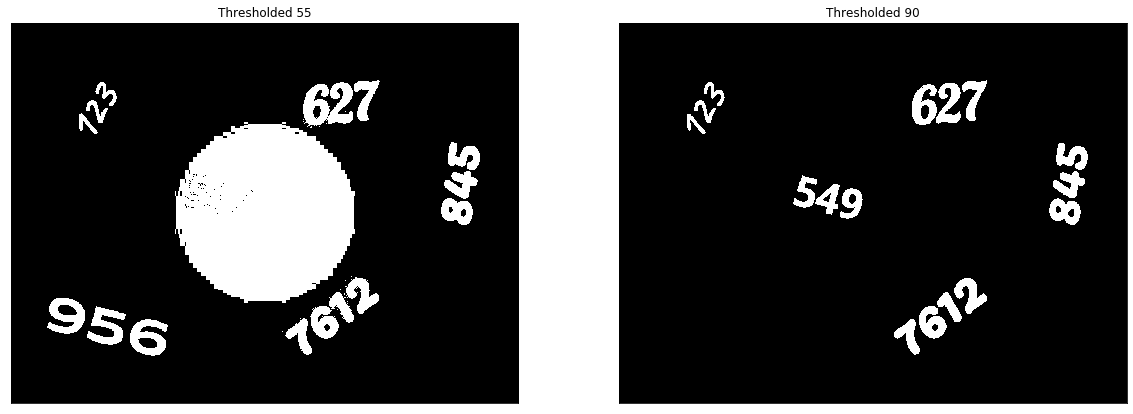

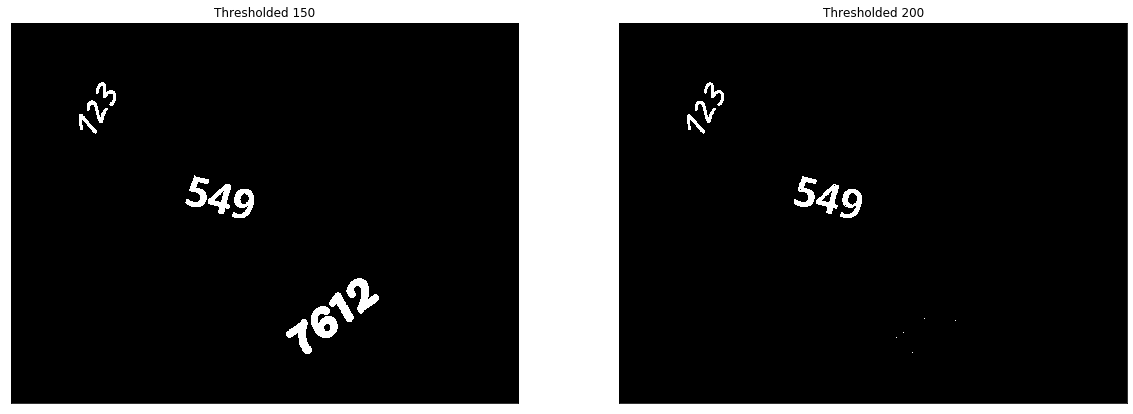

In [2]:
# load image
image_path = "./numbers.jpg"
img = cv2.imread(image_path)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

# set the threshold 55, 90 and 150
THRESH_1 = 55
THRESH_2 = 90
THRESH_3 = 150
THRESH_4 = 200
            
# same operation without loops
ret, img_thresh_1 = cv2.threshold(img_gray, THRESH_1, 255, cv2.THRESH_BINARY)
ret, img_thresh_2 = cv2.threshold(img_gray, THRESH_2, 255, cv2.THRESH_BINARY)
ret, img_thresh_3 = cv2.threshold(img_gray, THRESH_3, 255, cv2.THRESH_BINARY)
ret, img_thresh_4 = cv2.threshold(img_gray, THRESH_4, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img_thresh_1, cmap="gray")
plt.title("Thresholded 55"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_thresh_2, cmap="gray")
plt.title("Thresholded 90"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img_thresh_3, cmap="gray")
plt.title("Thresholded 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_thresh_4, cmap="gray")
plt.title("Thresholded 200"), plt.xticks([]), plt.yticks([])
plt.savefig('Thresholded_200.jpg')
plt.show()

## 1.2 
#### Write your observations about thresholded images at different thresholds. How many and which numbers are segmented at each threshold?
#### (A number is considered as segmented if all digits of that number are considered as foreground in the thresholded image) 
With the threshold value increasing, the number of segments showing on the thresholded images are decreasing.
The functionality of 'cv2.threshold' is that for every pixel, If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value and it is what the forth arguement in the function 'cv2.threshold' does (The 'cv2.THRESH_BINARY' ).
The first argument is the source image, which should be a grayscale image.
The second argument is the threshold value which is used to classify the pixel values.
The third argument is the maximum value which is assigned to pixel values exceeding the threshold.
- For the threshold 55, the white glow in the grayscale image is magnified due to the threshold function since all the numbers are showing. Because all of the segments' pixel value are larger than 55.
- For the threshold 90, the 956 and the white part in the 55 are gone. and the other are segmented.
- For the thresholded 150, the 627, 845 956 and the white part are gone and the 123, 549 7812 are segmented.
- For the thresholded 200, the 123, 549 are segmented and 7812 are left with 5 white spot.

#### What else do you observe at each threshold?
With the threshold increasing, the segmented part is getting fuzzy. For example the '123' is much clear in threshold 55 than threshold 200.
255 is the white color and 0 is the black

## 1.3
#### Find a threshold such that only numbers "123" and "549" are segmented (i.e. considered as foreground - white pixel - 255 value).
Since in the previous question, I releasize that there just be few white spot segmented for the number '7812' on the image 'thresholded 200' then I should start from threshold 200. At last I found out 206 is the nearest result. (even 205 gives me two white spots)

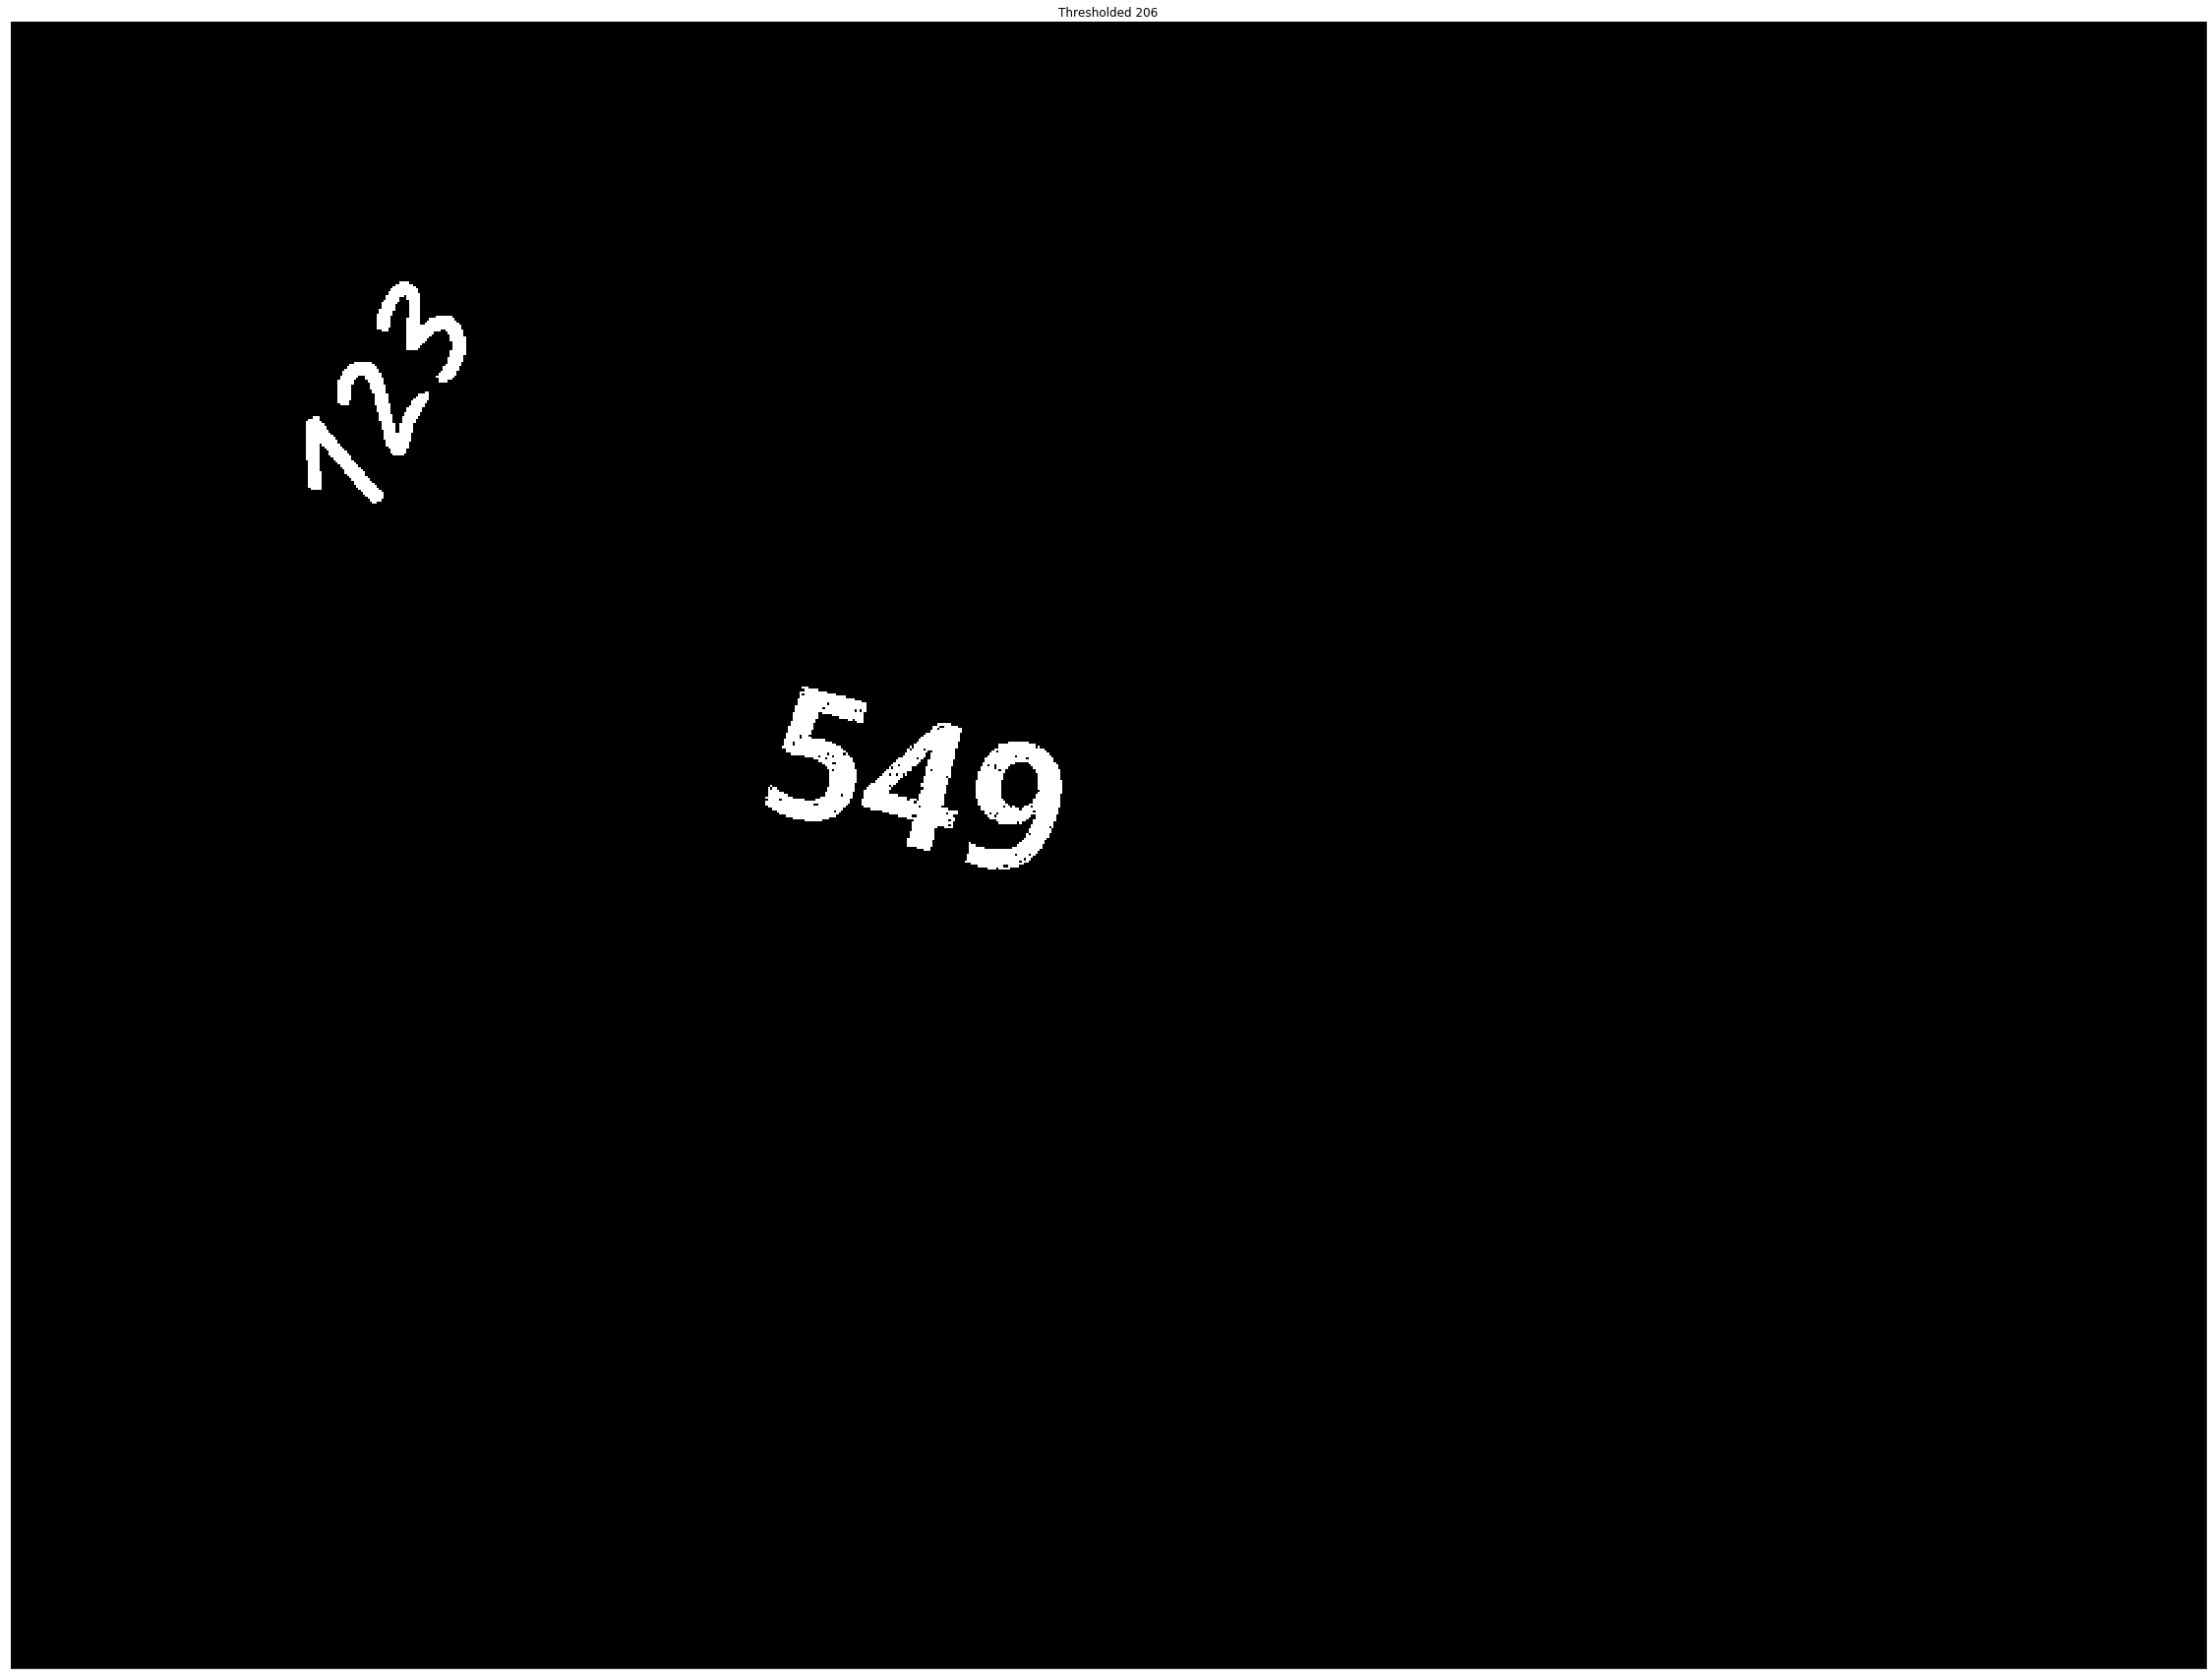

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# load image
image_path = "./numbers.jpg"
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape
THRESH_4 = 206
ret, img_thresh_4 = cv2.threshold(img_gray, THRESH_4, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(40, 40))
plt.imshow(img_thresh_4, cmap="gray")
plt.title("Thresholded 206"), plt.xticks([]), plt.yticks([])
plt.show()

# 2 Filtering

## 2.1 Denoising

### 2.1.1, 2.1.2

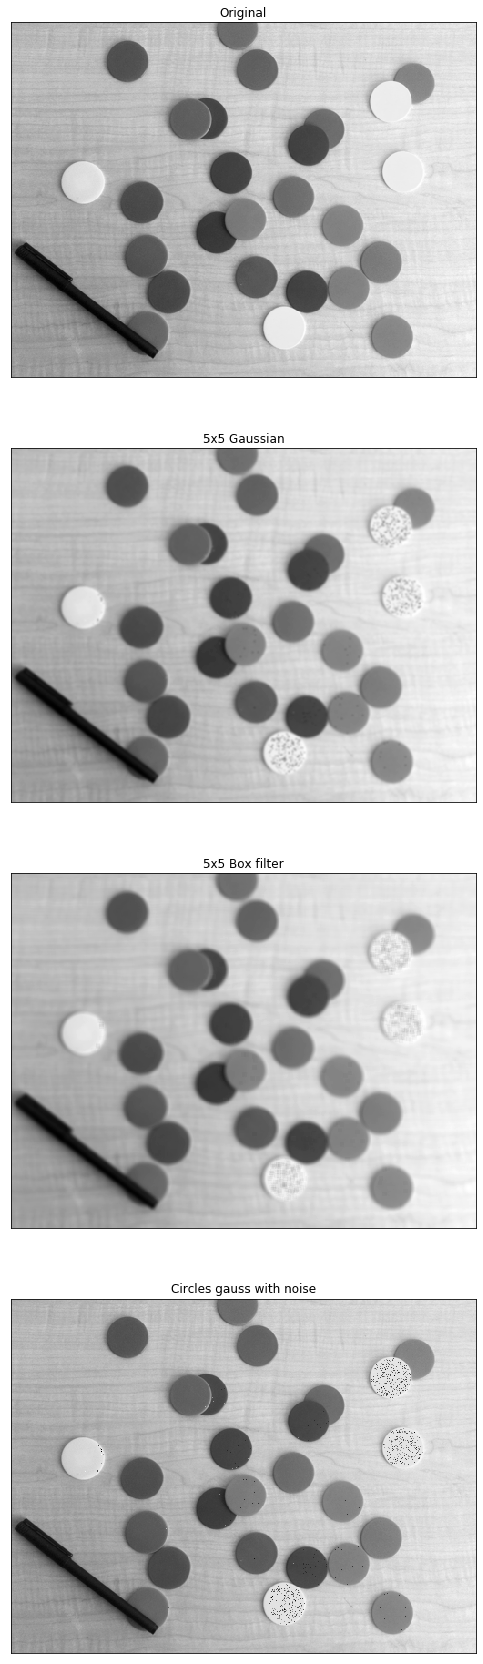

In [4]:
# 2.1.1, 2.1.2
# load image
image_path = "./Circles.png" # use your own image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

noise_image_path = "./Circles_gauss.png"
noise_imag = cv2.imread(noise_image_path, cv2.IMREAD_GRAYSCALE)

# filter image using 5x5 Gaussian, the std is calculated automatically
res1 = cv2.GaussianBlur(noise_imag, (5,5), 0)


# create a box filter
# filter the image
res2 = cv2.blur(noise_imag, (5,5))

# display images
plt.figure(figsize=(30, 30))
plt.subplot(411), plt.imshow(img, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(res1, cmap = 'gray')
plt.title("5x5 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(res2, cmap = 'gray')
plt.title("5x5 Box filter"), plt.xticks([]), plt.yticks([])
plt.subplot(414), plt.imshow(noise_imag, cmap = 'gray')
plt.title("Circles gauss with noise"), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
# 2.1.3

diff1 = cv2.PSNR(res1, img)
diff2 = cv2.PSNR(res2, img)
print('5x5 Gaussian filter\'s PNSR is ', diff1)
print('5x5 Box filter\'s PNSR is ',diff2)

# The PSNR of Gaussian filter is bigger than Box filter 
# this means that the gaussian filter will provide a better result.

5x5 Gaussian filter's PNSR is  34.45888479026088
5x5 Box filter's PNSR is  32.64650460360563


### 2.1.3
#### Compare the PSNR (Eq.1) of both of the denoised images to that of the clean image and state which method gives the superior result.
MSE = $\frac{\sum_{M, N} [I_1(m, n) - I_2(m, n)]^2}{M \cdot N}$

PSNR = $10 \cdot log_{10}(\frac{255^2}{MSE}) $

PNSR is peak signal-to-noise ratio. A higher PSNR generally indicates that the reconstruction is of higher quality (https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio）. The Gaussian filter gives a higher PSNR than box filter so it means that the the gaussian filter will provide a better result.

### 2.1.4 with 9x9 filter

9x9 Gaussian filter's PNSR is  32.68002449425201
9x9 Box filter's PNSR is  29.700705335960464


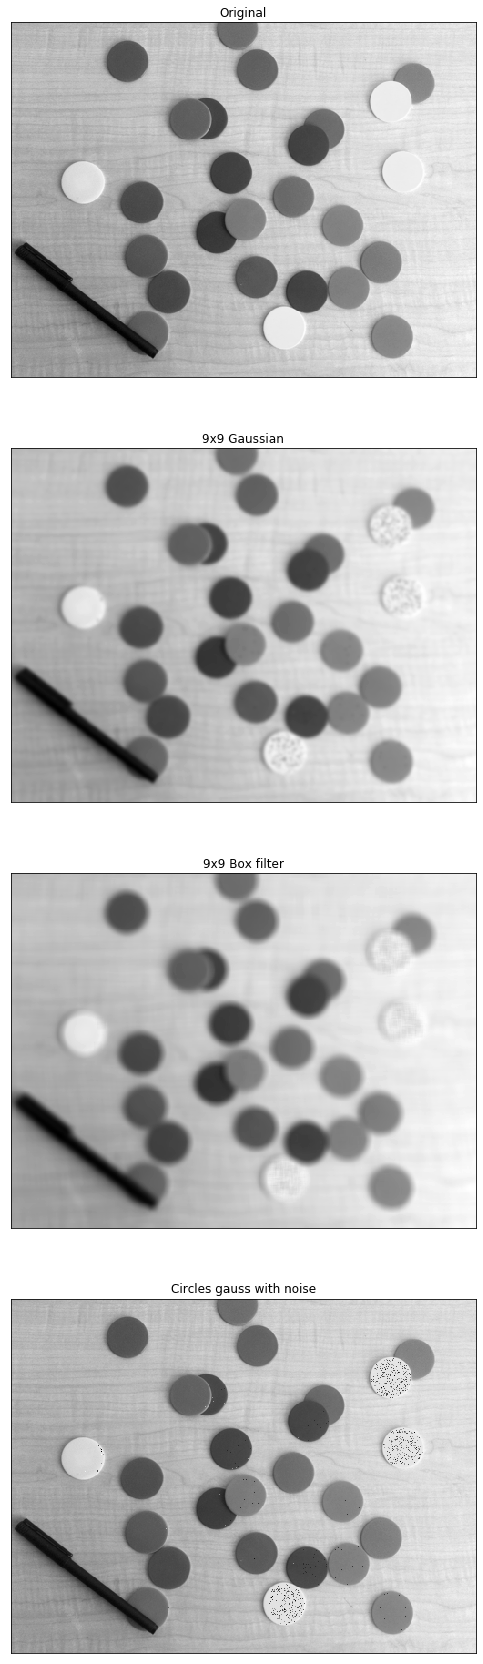

In [6]:
# 2.1.4 with 9x9 filter
# load image
image_path = "./Circles.png" # use your own image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

noise_image_path = "./Circles_gauss.png"
noise_imag = cv2.imread(noise_image_path, cv2.IMREAD_GRAYSCALE)

# filter image using 5x5 Gaussian
res1 = cv2.GaussianBlur(noise_imag, (9,9), 0)

# create a box filter
# filter the image
kernel = np.ones((9,9), np.float32)/(9*9)
# print("kernel:", kernel)
res2 = cv2.blur(noise_imag, (9,9))

diff1 = cv2.PSNR(res1, img)
diff2 = cv2.PSNR(res2, img)
print('9x9 Gaussian filter\'s PNSR is ', diff1)
print('9x9 Box filter\'s PNSR is ',diff2)

plt.figure(figsize=(30, 30))
plt.subplot(411), plt.imshow(img, cmap = 'gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(res1, cmap = 'gray')
plt.title("9x9 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(res2, cmap = 'gray')
plt.title("9x9 Box filter"), plt.xticks([]), plt.yticks([])
plt.subplot(414), plt.imshow(noise_imag, cmap = 'gray')
plt.title("Circles gauss with noise"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.4 with 13x13 filter

13x13 Gaussian filter's PNSR is  31.195207041592482
13x13 Box filter's PNSR is  27.763219472183856


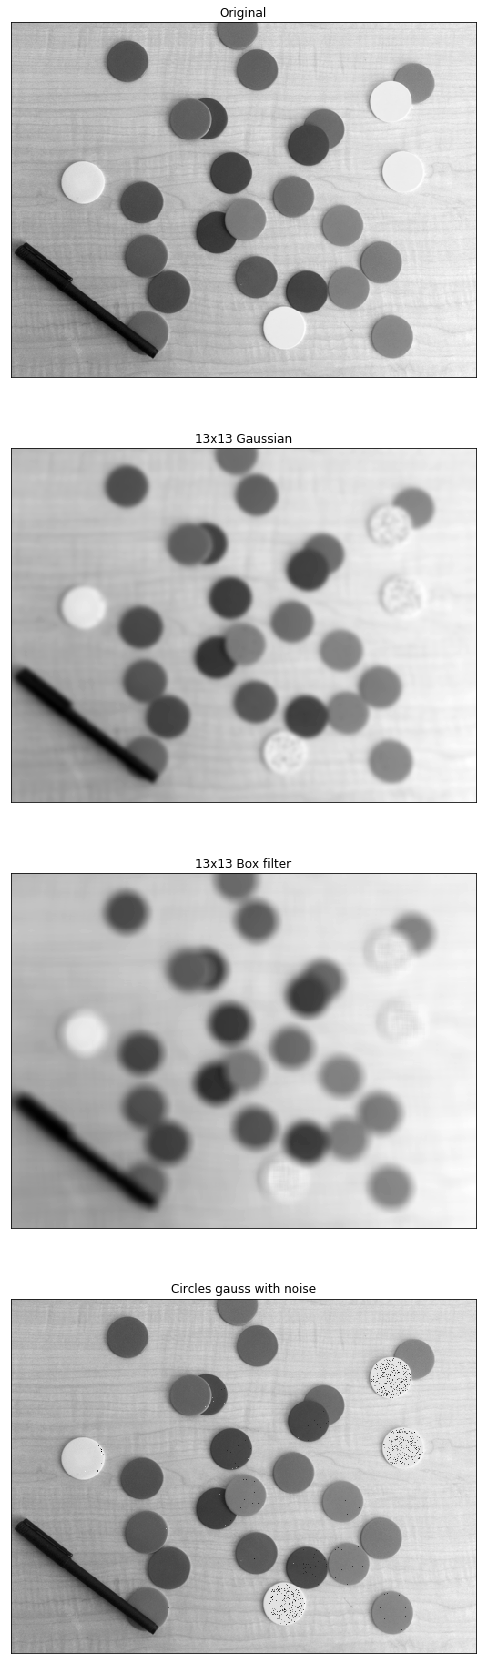

In [7]:
## 2.1.4 with 13x13 filter
# load image
image_path = "./Circles.png" # use your own image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

noise_image_path = "./Circles_gauss.png"
noise_imag = cv2.imread(noise_image_path, cv2.IMREAD_GRAYSCALE)

# filter image using 5x5 Gaussian
res1 = cv2.GaussianBlur(noise_imag, (13,13), 0)

# create a box filter
# filter the image
kernel = np.ones((13,13), np.float32)/(13*13)
# print("kernel:", kernel)
res2 = cv2.blur(noise_imag, (13,13))

diff1 = cv2.PSNR(res1, img)
diff2 = cv2.PSNR(res2, img)
print('13x13 Gaussian filter\'s PNSR is ', diff1)
print('13x13 Box filter\'s PNSR is ',diff2)

plt.figure(figsize=(30, 30))
plt.subplot(411), plt.imshow(img, cmap = 'gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(res1, cmap = 'gray')
plt.title("13x13 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(res2, cmap = 'gray')
plt.title("13x13 Box filter"), plt.xticks([]), plt.yticks([])
plt.subplot(414), plt.imshow(noise_imag, cmap = 'gray')
plt.title("Circles gauss with noise"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.4
#### What do you observe?
As the size of the filter increasing the image is getting more and more blur for both filters <br />
But also the noise is also canceling.
#### Does PSNR increase for both filtering?
The PSNR for both images are decreasing.
#### Do you think visually image quality increases?
The visually image quaility are decreasing and it make sense because the PSNR is decreasing so it means that the filtered image is getting more and more blurred from the original image.

### 2.1.5 and 2.1.6 and 2.1.7

5x5 Gaussian filter's PNSR is  28.964408033279128
5x5 Median filter's PNSR is  37.32623206399119


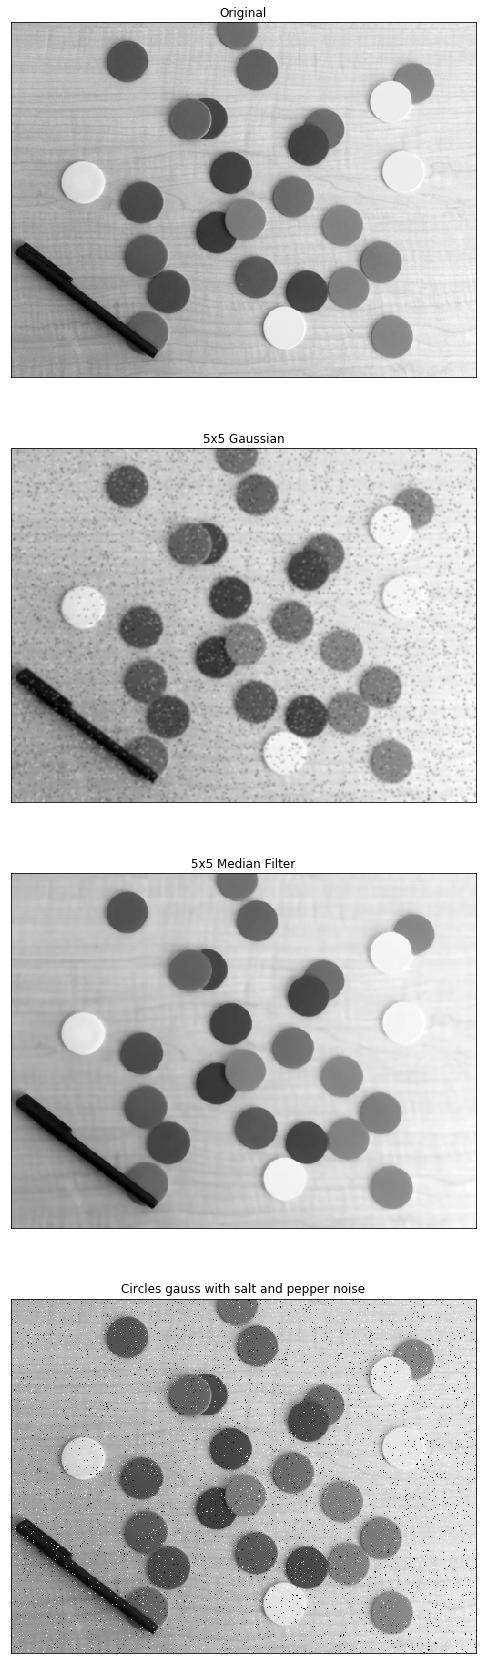

In [8]:
# 2.1.5 and 2.1.6 and 2.1.7
# load image
image_path = "./Circles.png" # use your own image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sp_image_path = "./Circles_sp.png"
sp_imag = cv2.imread(sp_image_path, cv2.IMREAD_GRAYSCALE)

# filter image using 5x5 Gaussian, the std is calculated automatically
res1 = cv2.GaussianBlur(sp_imag, (5,5), 0)

# filter image using 5x5 median filter
res2 = cv2.medianBlur(sp_imag, 5)
# 2.1.7
diff1 = cv2.PSNR(res1, img)
diff2 = cv2.PSNR(res2, img)
print('5x5 Gaussian filter\'s PNSR is ', diff1)
print('5x5 Median filter\'s PNSR is ',diff2)

plt.figure(figsize=(30, 30))
plt.subplot(411), plt.imshow(img, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(res1, cmap="gray")
plt.title("5x5 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(res2, cmap="gray")
plt.title("5x5 Median Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(414), plt.imshow(sp_imag, cmap="gray")
plt.title("Circles gauss with salt and pepper noise"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.8 with 9x9 size of filter

In [ ]:
# 2.1.8 with 9x9 size of filter
# load image
image_path = "./Circles.png" # use your own image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
sp_image_path = "./Circles_sp.png"
sp_imag = cv2.imread(sp_image_path, cv2.IMREAD_GRAYSCALE)

# filter image using 5x5 Gaussian, the std is calculated automatically
res1 = cv2.GaussianBlur(sp_imag, (9,9), 0)
# filter image using 5x5 median filter
res2 = cv2.medianBlur(sp_imag, 9)
diff1 = cv2.PSNR(res1, img)
diff2 = cv2.PSNR(res2, img)
print('9x9 Gaussian filter\'s PNSR is ', diff1)
print('9x9 Median filter\'s PNSR is ',diff2)

plt.figure(figsize=(30, 30))
plt.subplot(411), plt.imshow(img, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(res1, cmap="gray")
plt.title("9x9 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(res2, cmap="gray")
plt.title("9x9 Median Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(414), plt.imshow(sp_imag, cmap="gray")
plt.title("Circles gauss with salt and pepper noise"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.8 with 13x13 size of filter

In [ ]:
# 2.1.8 with 13x13 size of filter
# load image
image_path = "./Circles.png" # use your own image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sp_image_path = "./Circles_sp.png"
sp_imag = cv2.imread(sp_image_path, cv2.IMREAD_GRAYSCALE)

# filter image using 5x5 Gaussian, the std is calculated automatically
res1 = cv2.GaussianBlur(sp_imag, (13,13), 0)
# filter image using 5x5 median filter
res2 = cv2.medianBlur(sp_imag, 13)
diff1 = cv2.PSNR(res1, img)
diff2 = cv2.PSNR(res2, img)
print('13x13 Gaussian filter\'s PNSR is ', diff1)
print('13x13 Median filter\'s PNSR is ',diff2)

plt.figure(figsize=(30, 30))
plt.subplot(411), plt.imshow(img, cmap = 'gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(412), plt.imshow(res1, cmap = 'gray')
plt.title("13x13 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(413), plt.imshow(res2, cmap = 'gray')
plt.title("13x13 Median Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(414), plt.imshow(sp_imag, cmap = 'gray')
plt.title("Circles gauss with salt and pepper noise"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.8 
### What do you observe? Does PSNR increase for both fltering? Do you think visually image quality increases?
The PSNR for Median filter is higher than Gaussian filter. The PSNR for size 9x9 median filter is the highest among all the filter (when the size is 13x13 the PSNR is decreased). Visually, the 9x9 median filter gives the best quality. For Gaussian filter, with the size increasing the PSNR is decreasing and the quality is decreasing visually.

## 2.2 Sharpening

### 2.2.1 
- In short, Sharpening is defined as follows:
- sharpened image (S) = original image (I) + details (D)
  <br />which gives<br />
- sharpened images (S) = 2*original image (I) - blurred image (B)

In [ ]:
# 2.2.1 
# load image
image_path = "./rice.png" # use your own image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# create a box filter
res1 = cv2.blur(img, (7,7))
# filter image using 7x7 Gaussian, the std is calculated automatically
res2 = cv2.GaussianBlur(img, (7,7), 0)
details1 = img - res1;
sharp1 = img + details1;
details2 = img - res2;
sharp2 = img + details2;

diff_box_sharp = cv2.PSNR(img, sharp1)
diff_gaussian_sharp = cv2.PSNR(img, sharp2)
print('Box filter sharpened and original PSNR is ', diff_box_sharp)
print('Gaussian filter sharpened and original PSNR is ', diff_gaussian_sharp)
plt.figure(figsize=(30, 30))
plt.subplot(311), plt.imshow(img, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharp1, cmap="gray")
plt.title("sharpened image with box filter"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharp2, cmap="gray")
plt.title("sharpened image with Gaussian filter"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.2.2
### Which of the two methods is expected to give better results and why? Can you observe expected result?

- Visually, the box filter sharpening gives the better result than Gaussian filter sharpening (with a more sharpen edge).
- This is because that the Gaussian filter will weight more on the edge. But the formula for sharpening an image is:
  <br />
  ###### sharpning = 2*original - blur
   <br />
- If you reduce the edge more which Gaussian filter sharpening does the result will be more blur as the edges are blured.

# 3 Edge detection

## 3.1 Sobel edge detector

### 3.1.1 Effect of sharpening on edge detection

- Apply a Sobel edge detector to the image 'rice.png'.Use kernel size of 5.
- Apply a Sobel edge detector to the two previously-sharpened images(using Gaussian and Box filters in Section-2.2) with same kernel size.
- First, recover the magnitude and then apply Thresholding (Section-1) on the magnitude image. 
- Apply two different thresholds: 200 and 800. As you will apply thresholding on the three generated images from the lasttwo questions
- This should result in a total of 6 thresholded images.

In [ ]:
# store image path
img_path = "./rice.png"
# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 5x5 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)

# apply 5x5 Sobel filters to the intensity channel
sharp1_x = cv2.Sobel(sharp1, cv2.CV_64F, 1, 0, ksize=5)
sharp1_y = cv2.Sobel(sharp1, cv2.CV_64F, 0, 1, ksize=5)
# compute sobel Magnitude/Phase
sharp1_m = cv2.magnitude(sharp1_x, sharp1_y)
sharp1_p = cv2.phase(sharp1_x, sharp1_y)

# apply 5x5 Sobel filters to the intensity channel
sharp2_x = cv2.Sobel(sharp2, cv2.CV_64F, 1, 0, ksize=5)
sharp2_y = cv2.Sobel(sharp2, cv2.CV_64F, 0, 1, ksize=5)
# compute sobel Magnitude/Phase
sharp2_m = cv2.magnitude(sharp2_x, sharp2_y)
sharp2_p = cv2.phase(sharp2_x, sharp2_y)

THRESH_1 = 200
THRESH_2 = 800

# same operation without loops
ret, img_thresh_200 = cv2.threshold(I_m, THRESH_1, 255, cv2.THRESH_BINARY)
ret, img_thresh_800 = cv2.threshold(I_m, THRESH_2, 255, cv2.THRESH_BINARY)
ret, sharp_box_thresh_200 = cv2.threshold(sharp1_m, THRESH_1, 255, cv2.THRESH_BINARY)
ret, sharp_box_thresh_800 = cv2.threshold(sharp1_m, THRESH_2, 255, cv2.THRESH_BINARY)
ret, sharp_gaussian_thresh_200 = cv2.threshold(sharp2_m, THRESH_1, 255, cv2.THRESH_BINARY)
ret, sharp_gaussian_thresh_800 = cv2.threshold(sharp2_m, THRESH_2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img_thresh_200, cmap="gray")
plt.title("img_thresh_200"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_thresh_800, cmap="gray")
plt.title("img_thresh_800"), plt.xticks([]), plt.yticks([])
plt.show()
# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharp_box_thresh_200, cmap="gray")
plt.title("sharp_box_thresh_200"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharp_box_thresh_800, cmap="gray")
plt.title("sharp_box_thresh_800"), plt.xticks([]), plt.yticks([])
plt.show()
# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharp_gaussian_thresh_200, cmap="gray")
plt.title("sharp_gaussian_thresh_200"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharp_gaussian_thresh_800, cmap="gray")
plt.title("sharp_gaussian_thresh_800"), plt.xticks([]), plt.yticks([])
plt.show()


### 3.1.1
#### Comment on the effectiveness of using sharpening prior to the edge detection.
The sharped one will give more details about the edges since the sharped one already magnify the edges so it will make the edge detection easier. But it will also give some noises.



#### Comment on the effect of the different threshold values.
The higher threshold will give a less noise edge images since if the threshold is high then a lot of noise will filter out more noise.

## 3.1.2 Effect of Denoising on Edge Detection:

#### Apply a Sobel edge detector (Filter size 5) to the image 'cameramen.jpg'. Threshold the magnitude using a threshold value of 1500.
#### First denoise image with a 5x5 gaussian filter and then apply a Sobel edge detector. Use the same value of threshold (1500).

In [ ]:
# 3.1.2.2
THRESH = 1500
# store image path
img_path = "./cameraman.jpg"
# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

denoised_img = cv2.GaussianBlur(img, (5,5), 0)

# apply 5x5 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
I_m = cv2.magnitude(I_x, I_y)
# same operation without loops
ret, img_thresh = cv2.threshold(I_m, THRESH, 255, cv2.THRESH_BINARY)

# apply 5x5 Sobel filters to the intensity channel
denoised_x = cv2.Sobel(denoised_img, cv2.CV_64F, 1, 0, ksize=5)
denoised_y = cv2.Sobel(denoised_img, cv2.CV_64F, 0, 1, ksize=5)
denoised_m = cv2.magnitude(denoised_x, denoised_y)
# same operation without loops
ret, denoised_thresh = cv2.threshold(denoised_m, THRESH, 255, cv2.THRESH_BINARY)


# display images
plt.figure(figsize=(30, 30))
plt.subplot(311), plt.imshow(denoised_img, cmap="gray")
plt.title("Denoised image"), plt.xticks([]), plt.yticks([])
plt.subplot(312), plt.imshow(img_thresh, cmap="gray")
plt.title("img_thresh"), plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(denoised_thresh, cmap="gray")
plt.title("denoised_thresh"), plt.xticks([]), plt.yticks([])
plt.show()



#### Comment on the effectiveness of using denoising prior to edge detection.
The denoised image will give a more clear edge since the noise has already been filtered.

### 3.2 Laplacian of Gaussian
#### Apply a 5 x 5 Laplacian of Gaussian edge detector to the image 'cameraman.jpg'.
#### Increase the size of the filter to 15 x 15. Write your observations about the edge maps.

In [ ]:
# store image path
img_path = "./cameraman.jpg"
# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 5x5 and 15x15 Laplacian filter to the intensity channel
I_lap_5 = cv2.Laplacian(img, cv2.CV_32F, ksize=5)
I_lap_15 = cv2.Laplacian(img, cv2.CV_32F, ksize=15)
# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(I_lap_5, cmap="gray")
plt.title("5 x 5"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_lap_15, cmap="gray")
plt.title("15 x 15"), plt.xticks([]), plt.yticks([])
plt.show()

#### Observation
With the size of the filter increasing, the image is getting blured. For the 5x5 filter we can see the details of the camera but in the 15x15 we can't.

## 3.3 Canny Edge Detection
### 3.3.1
#### Briefly describe 4 main steps of canny edge detection.
- Do a gaussian blur removes some of the noise before further processing the image
- Determine the intensity gradients (An edge occurs when the color of an image changes, hence the intensity of the pixel changes as well)
- Perform non maximum suppression to thin out the edges (find the local max)
- Edge Tracking by Hysteresis


In [ ]:
# store image path
dop_img_path = "./dolphin.jpg"
# load image as gray-scaled
dop_img = cv2.imread(dop_img_path, cv2.IMREAD_GRAYSCALE)

kernel = {5, 9, 13}
lowers = {10, 30, 50}
highers = {100, 150, 200}

for lower in lowers:
    for higher in highers:
        # blur image before-hand
        dop_img_0 = cv2.GaussianBlur(dop_img, (5, 5), 0)
        dop_img_1 = cv2.GaussianBlur(dop_img, (9, 9), 0)
        dop_img_2 = cv2.GaussianBlur(dop_img, (13, 13), 0)
        
        # compute Canny edges
        dop_I_edge_0 = cv2.Canny(dop_img_0, lower, higher)
        dop_I_edge_1 = cv2.Canny(dop_img_1, lower, higher)
        dop_I_edge_2 = cv2.Canny(dop_img_2, lower, higher)
        # display images
        title = 'K: {}, L: {}, H: {}'
        plt.figure(figsize=(15, 15))
        plt.subplot(131), plt.imshow(dop_I_edge_0, cmap="gray")
        plt.title(title.format(5, lower, higher)), plt.xticks([]), plt.yticks([])
        plt.subplot(132), plt.imshow(dop_I_edge_1, cmap="gray")
        plt.title(title.format(9, lower, higher)), plt.xticks([]), plt.yticks([])
        plt.subplot(133), plt.imshow(dop_I_edge_2, cmap="gray")
        plt.title(title.format(13, lower, higher)), plt.xticks([]), plt.yticks([])
        plt.show()
# # blur image before-hand
# dop_img = cv2.GaussianBlur(dop_img, (5, 5), 0)

# # compute Canny edges
# dop_I_edge = cv2.Canny(dop_img, 10, 100)

# # display images
# plt.figure(figsize=(10, 10))
# plt.subplot(111), plt.imshow(dop_I_edge, cmap="gray")
# plt.title("I_edge"), plt.xticks([]), plt.yticks([])
# plt.show()

### 3.3.3
#### Comment on how changing values of each hyper-parameters (K,L,U) effects the overall edge detection. 
- Each row is a comparsion of K which is the kernel size (gaussian filter) and with the K increasing the edges are segmented less and less. This is due to the Gaussian filter and it cancels all the noise along with the edges are canceled
- As we increase the higher threshold we can see that the small segments are descreasing. This is because that the higher threshold is detecting the larger or more clear edges. That is only the segments with large intensity gradient are saved
- If we look at 'K 5 L 10 H 200' and 'K 5 L 50 H 200', the part with low intensity gradient are filtered.

#### Is there is any relationship between any hyper-parameters?
The gaussian filter is to filter out the noise that is not edges.
The higher and lower threshold is to determine whether it is an edge or should be ignored
Any edges with intensity gradient more than higher threshold are edges and those below lower threshold are non-edges

In [ ]:
dop_img = cv2.GaussianBlur(dop_img, (7, 7), 0)
dop_I_edge = cv2.Canny(dop_img, 130, 418)
plt.figure(figsize=(10, 10))
plt.imshow(dop_I_edge, cmap="gray")
plt.title('Only dolphin'), plt.xticks([]), plt.yticks([])
plt.show()

#### Importance: Collaborate with Chuning (Lily) Li 260664379 for the short answer question and the for loop of last question